# Feature Engineering

In [1]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv("linear08.csv")

<AxesSubplot: xlabel='x1', ylabel='y'>

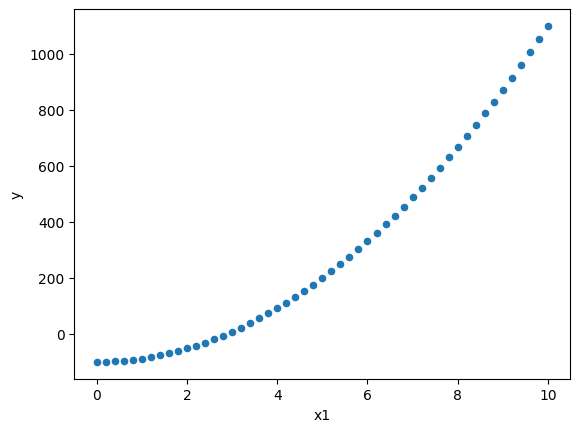

In [3]:
df.plot.scatter(x="x1", y="y")

### The idea behind feature engineering

The data itself is not linear.  
We apply a mathematical transformation to x or y so that it becomes linear:
    
$y = a* f(x) + b$

the transformation function $f$ is called "feature engineering".

feature engineering: *we try different things on our data to make it fit better to our model* (make it linear in this case)

### Polynomial: take x1 to the square (same as square root of y)
This is an example of a simple polynomial transformation

$y = a*x^2 + b$

<AxesSubplot: xlabel='x^2', ylabel='y'>

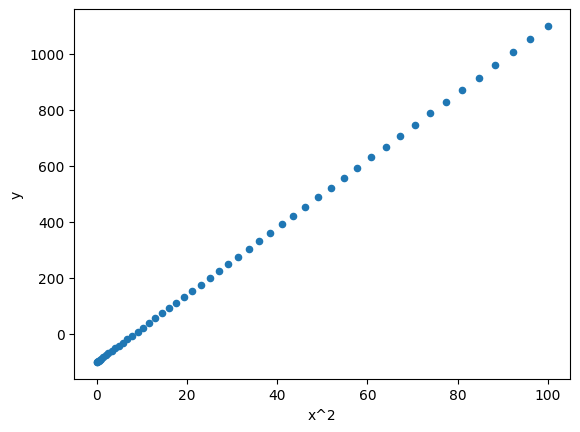

In [9]:
df["x^2"] = df["x1"] ** 2
df.plot.scatter(x="x^2", y="y")

### What options for Feature Engineering do we have?

* Polynomial terms ($x^2$ or $x^n$)
* Interaction terms (multiply two columns, if one of them is binary it works like an if..else)
* Exponentials (on x) and logarithms (on y)
* Train separate models for clusters
* use binary coefficients (c1..cn) for clusters (or other category) -> *"one-hot encoding"*
* use binning as a cheap way to make clusters from a numerical column

### How do we know which Feature Engineering to apply?

* for the project one is enough
* trial and error: try one, does the MSE become better? Repeat
* talk to your experts
* yes, plotting helps a lot with F.E., too
* it is possible to do Feature Engineering automatically. **This is dangerous**. Please don't do this in this course.

### Interaction Term

multiply two columns into one before fitting the model.

In [12]:
import seaborn as sns

<AxesSubplot: xlabel='x1', ylabel='y'>

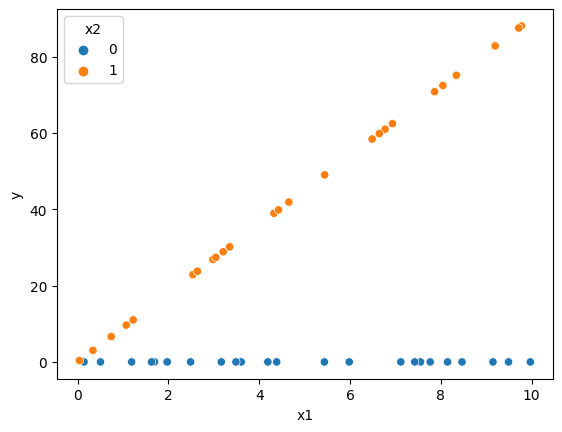

In [23]:
df = pd.read_csv("linear09.csv")
sns.scatterplot(data=df, x="x1", y="y", hue="x2")

We have to combine x1 and x2:

$y = a * (x1 * x2) + b$

or

$y = a_1 x_1 + a_2 x_2 + a_3 x_1 x_2 + b$

or combine an interaction term with a polynomial:

$y = a_1 x_1 + a_2 x_2 + a_3 x_1 x_2 + a_4 x_1^2 + a_5 x_2^2 + b$

*if x2 is 1, x1 is a normal linear function that influences y. However if x2 is zero, then y is also zero no matter what x1 is.*

### Exponential Function

frequent when you count stuff and you have counts over multiple dimensions (e.g. Netflix users with 1-10 movies watched, regular users (100-1000 movies), extreme (10000+)).

$y = a e^x + b$

alternatively modify y instead:

$log(y) = ax + b$

when you count stuff (money, stocks, crypto, rental bikes, flats, netflix movies, any retail stuff) use a small trick to avoid the -infinity problem:

$log(y+1) = ax + b$

<AxesSubplot: xlabel='exp', ylabel='y'>

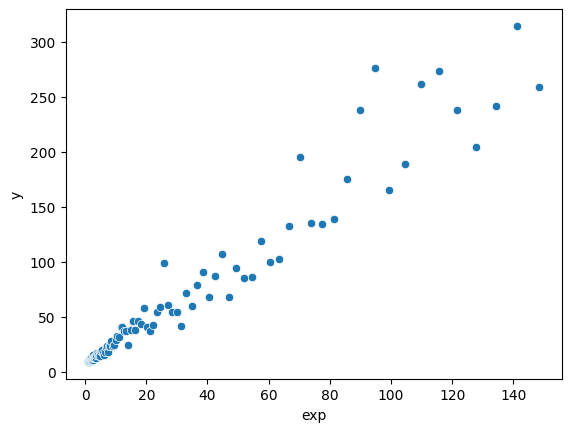

In [30]:
df = pd.read_csv("linear10.csv")
df["exp"] = np.exp(df["x1"])
sns.scatterplot(data=df, x="exp", y="y")

<AxesSubplot: xlabel='x1', ylabel='log_y'>

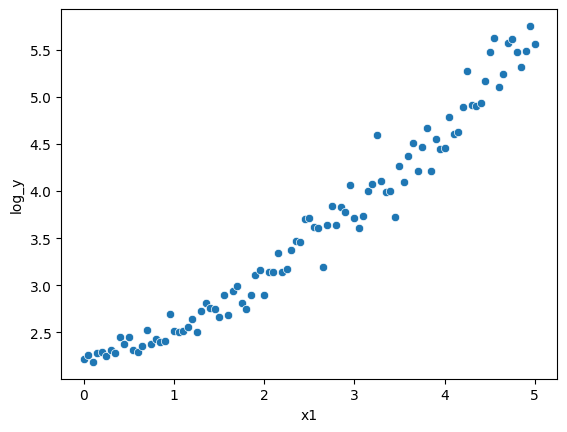

In [31]:
df["log_y"] = np.log(df["y"])   # natural log (base = e)
sns.scatterplot(data=df, x="x1", y="log_y")

### Clustered Data

We have data in three clusters, each of them with their own slope and intercept. We practically train three linear regression using one dataset and one model.

We need extra variables (columns) that say which cluster a point is in: $c1, c2, c3$ each having values 0 or 1.
It looks a little similar to the interaction terms.

$y = a_1 c_1 x + a_2 c_2 x + a_3 c_3 x + b$

We could write separate intercepts explicitly:

$y = a_1 c_1 x + a_2 c_2 x + a_3 c_3 x + b_1 c_1 + b_2 c_2 + b_3 c3$

For a data point in cluster 1 (c1=1, c2=0, c3=0) this looks like:

$y = a_1 c_1 x + b_1 c_1$


<AxesSubplot: xlabel='x1', ylabel='y'>

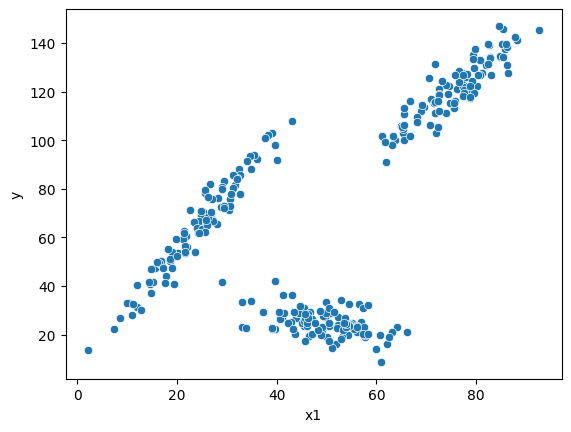

In [38]:
df = pd.read_csv("linear11.csv")
sns.scatterplot(data=df, x="x1", y="y")

There are multiple ways how we could get the cluster numbers:
    
1. Run a clustering algorithm (difficult, lots of hyperparameters but more powerful)
2. Use binning. A lot simpler. Example:

- if x1 < 40 -> c1
- if x1 > 60 -> c3
- otherwise -> c2